<a href="https://colab.research.google.com/github/MariaFernandaReyesLopez/Extraccion_conocimientos_BD/blob/main/Preparacion_de_los_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 2.2 Preparación de los datos

# Integrantes

*   Erick de Jesus Pérez Macias
*   Amairani Michel Duran Ibarra
*   María Fernanada Reyes Lopez



#Importamos librerias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from scipy import stats # Para regresion lineal

# Leemos los datos

In [ ]:
df= pd.read_csv("ecommerce_customers.csv")
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [ ]:
timeApp=df["Time on App"]
timeWeb=df["Time on Website"]
name=df["Avatar"]
amount=df["Yearly Amount Spent"]

# Vemos si hay datos duplicados

In [ ]:
df.duplicated().sum()

0

#Revisamos si hay datos nulos para hacer la limpieza

In [ ]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         1
Length of Membership    1
Yearly Amount Spent     0
dtype: int64

#Hay un dato nulo en Time of App y otro dato nulo en Length of Membership
##Procedemos a obtener la media aritmetica de dichos conjuntos de datos para poder sustituir los datos nulos

In [ ]:
timeAppMean=df["Time on App"].mean()
timeAppMean

12.052487936928012

In [ ]:
LengthMembershipMean=df["Length of Membership"].mean()
LengthMembershipMean

3.5355674753386777

#Ya tenemos los promedios de Time on App y de Length of Membership
##Ahora procederemos a reemplazar los datos nulos por los promedios obtenidos

In [ ]:
df["Time on Website"].replace(np.NaN,timeAppMean,inplace=True)
df["Length of Membership"].replace(np.NaN,LengthMembershipMean,inplace=True)

#Revisamos si aun existen datos nulos y podemos confirmar que ya no existen

In [ ]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

# Graficamos el tiempo que ocupan los usuario en la Aplicacion y en el Sitio Web

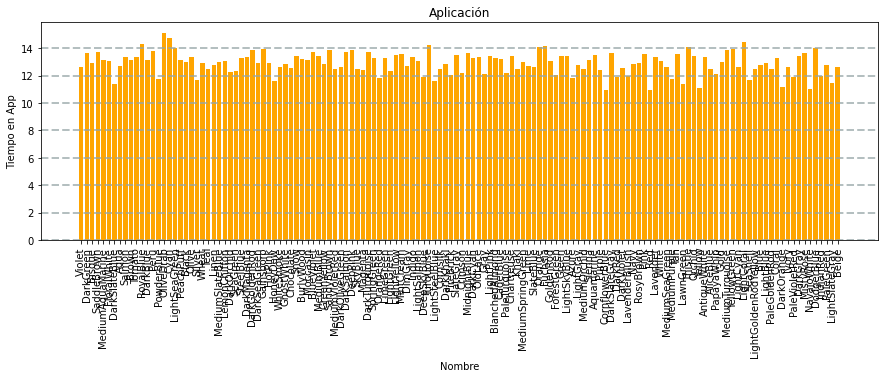

In [ ]:
fig = plt.figure(figsize=(15,4))
plt.bar(name,timeApp, color='orange')
plt.xlabel("Nombre")
plt.ylabel("Tiempo en App")
plt.title("Aplicación")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

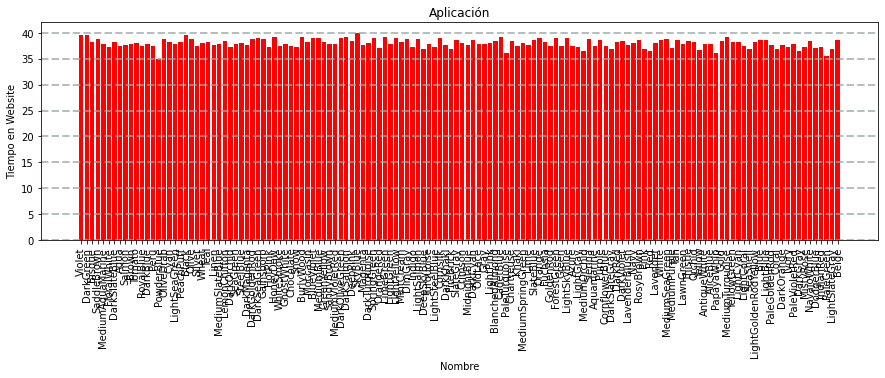

In [ ]:
fig = plt.figure(figsize=(15,4))
plt.bar(name,timeWeb, color='red')
plt.xlabel("Nombre")
plt.ylabel("Tiempo en Website")
plt.title("Aplicación")
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

#Ahora que ya limpiamos los datos 
##Tenemos que obtener la media aritmetica de Time on App y de Time on Website para observar en cual de ellas hay mas tiempo consumido por los usuarios
##Tambien la moda para ver cual tiempo se repite mas por los usuarios
##Y por ultimo la mediana

In [ ]:
df.mean()[["Time on App","Time on Website"]]

Time on App        12.052488
Time on Website    37.009774
dtype: float64

In [ ]:
# Obtener media de tiempo en App
timeAppMean = df.mean()["Time on App"]

# Obtener media de tiempo en Web
timeWebMean = df.mean()["Time on Website"]

print('Promedio tiempo App: {:.2f}\nPromedio tiempo Web: {:.2f}'.format(timeAppMean, timeWebMean))

Promedio tiempo App: 12.05
Promedio tiempo Web: 37.01


In [ ]:
df.median()[["Time on App","Time on Website"]]

Time on App        11.983231
Time on Website    37.065856
dtype: float64

In [ ]:
df[['Time on App',"Time on Website"]].mode()

,Time on App,Time on Website
0,8.508152,12.052488
1,8.668350,33.913847
2,9.316289,34.476878
3,9.477778,34.487185
4,9.607315,34.574028
...,...,...
495,14.288015,39.294043
496,14.325655,39.577668
497,14.426491,39.600376
498,14.715388,39.672591


###Se puede observar que la moda presenta 500 datos, esto es porque todos los datos son diferentes, no hay algun dato que se repita

# Visualización de las medidas de tendencia central datos tiempo que pasan los usuarios en la App

Minimum:8.51
Mean:12.05
Median:11.98
Maximum:15.13



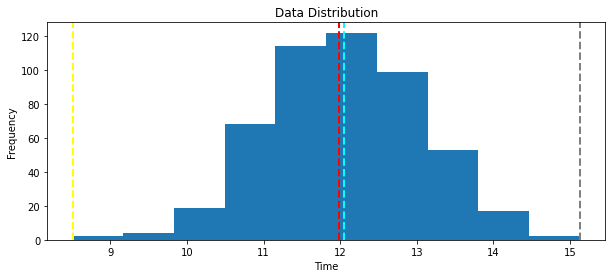

In [ ]:
# Histograma tiempo en App
var = df['Time on App']

min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                       max_val))


fig = plt.figure(figsize=(10,4))

plt.hist(var)

plt.axvline(x=min_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

plt.title('Data Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')

fig.show()

# Visualización de las medidas de tendencia central datos tiempo que pasan los usuarios en el Sitio Web

Minimum:12.05
Mean:37.01
Median:37.07
Maximum:40.01



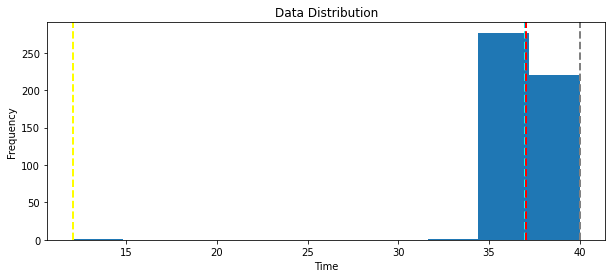

In [ ]:
# Histograma tiempo en Website
var = df['Time on Website']

min_val = var.min()
max_val = var.max()
mean_val = var.mean()
med_val = var.median()

print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                        mean_val,
                                                                                        med_val,
                                                                                        max_val))


fig = plt.figure(figsize=(10,4))

plt.hist(var)

plt.axvline(x=min_val, color = 'yellow', linestyle='dashed', linewidth = 2)
plt.axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
plt.axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
plt.axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

plt.title('Data Distribution')
plt.xlabel('Time')
plt.ylabel('Frequency')

fig.show()

# Análisis Monto gastado vs Tiempo en aplicación 

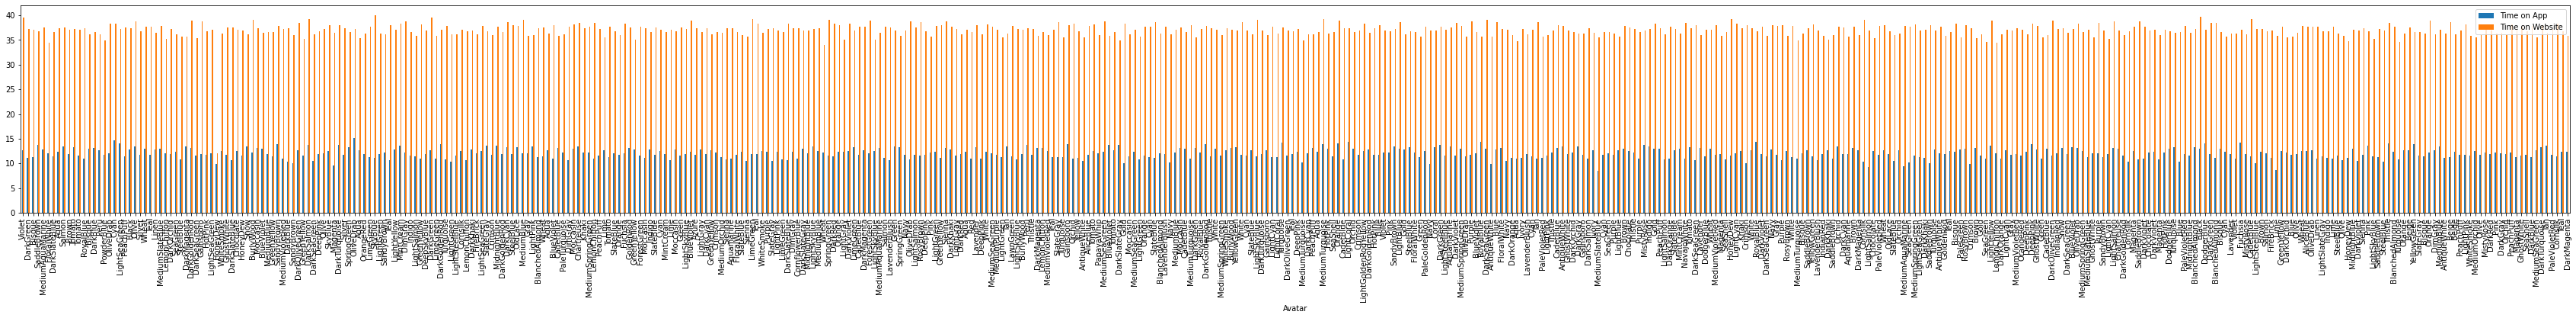

In [ ]:
df.plot(x='Avatar', y=['Time on App','Time on Website'], kind='bar', figsize=(60,5))

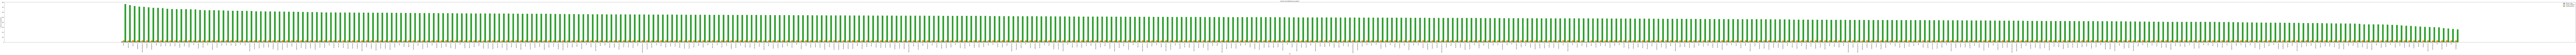

In [ ]:
df2 = df.sort_values('Yearly Amount Spent', ascending=False) 
serie_1 = df2['Time on App']
serie_2 = df2['Time on Website']
serie_3=  df2['Yearly Amount Spent']

 
 
numero_de_grupos = len(serie_1)
indice_barras = np.arange(numero_de_grupos)
ancho_barras =0.35
fig = plt.figure(figsize=(500,8))
plt.xticks(rotation=90)
plt.bar(indice_barras, serie_1, width=ancho_barras, label='Tiempo en App')
plt.bar(indice_barras + ancho_barras, serie_2, width=ancho_barras, label='Tiempo en Website')
plt.bar(indice_barras + ancho_barras + ancho_barras, serie_3, width=ancho_barras, label='Cantidad gastada')
plt.legend(loc='best')
## Se colocan los indicadores en el eje x
plt.xticks(indice_barras + ancho_barras, df['Avatar'])
 
plt.ylabel('Numero de habitantes')
plt.xlabel('Año')
plt.title('Numero de habitantes por genero')
 
plt.show()